<a href="https://colab.research.google.com/github/EugIva/ProzorovEI209M_CV/blob/main/HW1_Task3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
def plot_one_image(image: np.ndarray) -> None:
    """
    Отобразить изображение с помощью matplotlib.
    Вспомогательная функция.

    :param image: изображение для отображения
    :return: None
    """
    fig, axs = plt.subplots(1, 1, figsize=(8, 7))

    axs.imshow(image)
    axs.axis('off')
    plt.plot()

In [25]:
import cv2
import numpy as np

def rotate(image: np.ndarray, point: tuple, angle: float) -> np.ndarray:
    """
    :param image: исходное изображение
    :param point: значение точки (x, y), вокруг которой повернуть изображение
    :param angle: угол поворота
    :return: повернутое изображение
    """
    # Получаем размеры изображения
    (h, w) = image.shape[:2]

    # Преобразуем угол в радианы
    angle_rad = np.deg2rad(angle)

    # Отдельные координаты центра поворота
    cx, cy = point

    # Вычисляем новую ширину и высоту изображения после поворота
    new_w = int(abs(w * np.cos(angle_rad)) + abs(h * np.sin(angle_rad)))
    new_h = int(abs(h * np.cos(angle_rad)) + abs(w * np.sin(angle_rad)))

    # Вычисляем матрицу поворота
    M = cv2.getRotationMatrix2D(point, angle, 1)

    # Сдвигаем центр матрицы поворота, чтобы учитывать смещение в новом изображении
    M[0, 2] += (new_w - w) / 2
    M[1, 2] += (new_h - h) / 2

    # Выполняем вращение с учетом нового размера
    rotated_image = cv2.warpAffine(image, M, (new_w, new_h))

    return rotated_image


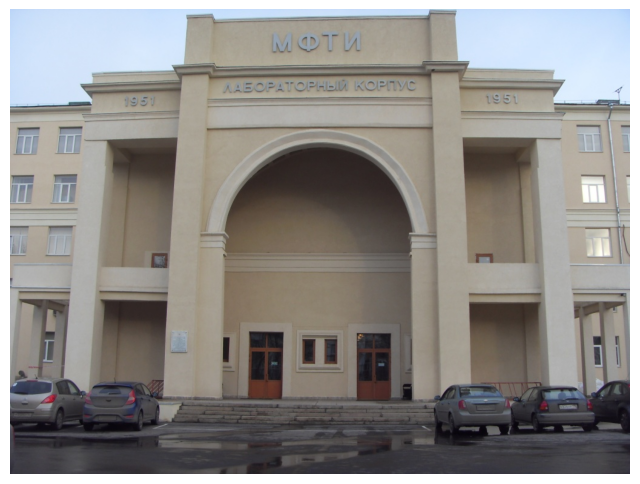

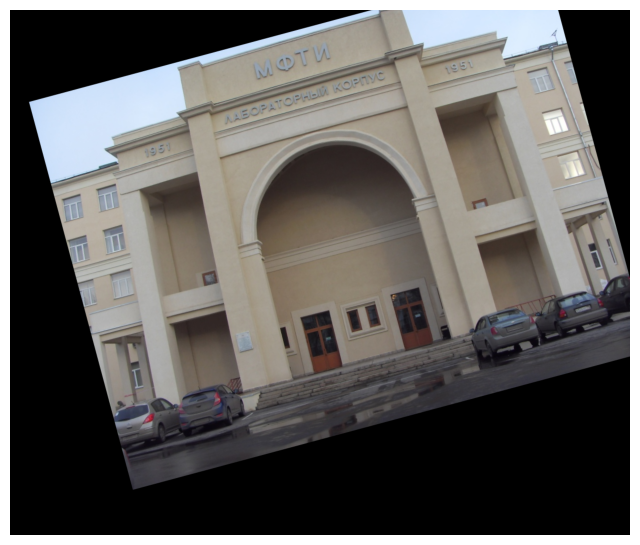

In [26]:
# Запуск
test_image = cv2.imread('lk.jpg')
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
plot_one_image(test_image)
test_point = (200, 200)
test_angle = 15
transformed_image = rotate(test_image, test_point, test_angle)
plot_one_image(transformed_image)